# Explore here

In [53]:
import pandas as pd
import utils as eda
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")

total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [54]:
total_data.shape

(41188, 21)

In [55]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

existe un total de 41188 filas y 20 columnas, no se aprecia que las columnas tengan nulos.

por otra parte, tenemos:

9 carasteristicas numericas y 11 carasteristicas categoricas.


In [56]:
total_data.drop(["contact", "day_of_week", "month","duration", "nr.employed", "pdays", "previous"], axis = 1, inplace = True)
total_data.head()

,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,1,nonexistent,1.1,93.994,-36.4,4.857,no


las columnas "contact", "day_of_week", "month","duration", "nr.employed", "pdays" y "previous" se han eliminado ya que no presentan informacion relevante para el analisis de los datos que se nos solicita, para el usuario al momento de la botecion de los datos fue relevante pero para nuestro analisis no lo son.

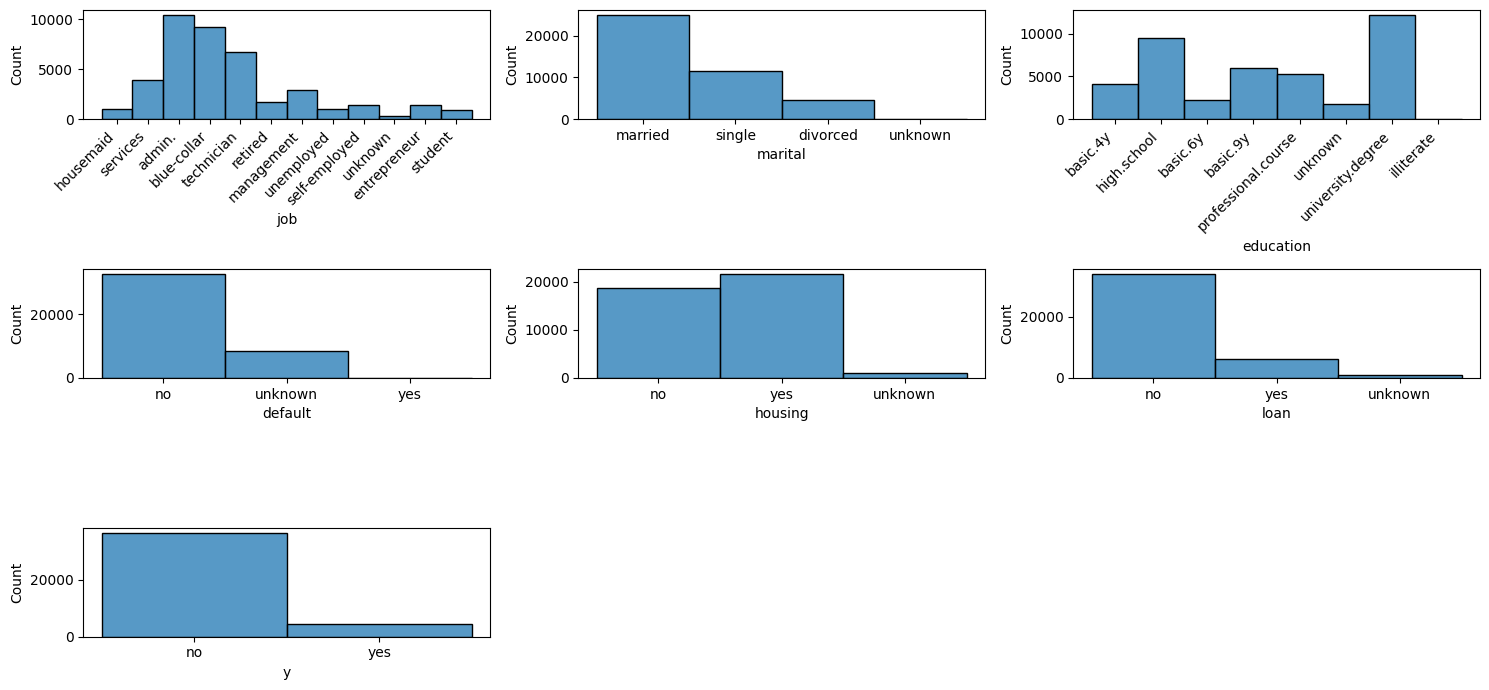

In [57]:
fig, axis = plt.subplots(3, 3, figsize=(15, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = total_data, x = "job")
sns.histplot(ax = axis[0,1], data = total_data, x = "marital")
sns.histplot(ax = axis[0,2], data = total_data, x = "education")
sns.histplot(ax = axis[1,0], data = total_data, x = "default")
sns.histplot(ax = axis[1,1], data = total_data, x = "housing")
sns.histplot(ax = axis[1,2], data = total_data, x = "loan")
sns.histplot(ax = axis[2,0], data = total_data, x = "y")
#plt.xticks(rotation=45, ha='right')
plt.setp(axis[0,0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axis[0,2].get_xticklabels(), rotation=45, ha='right')

fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



Job: El análisis de la ocupación de nuestros clientes revela que la mayoría se concentra en las categorías de "blue-collar", "management", "technician". Esto sugiere que nuestra base de clientes está compuesta principalmente por "trabajadores de oficios manuales y personal administrativo". Por otro lado, las ocupaciones menos representadas son "unknown" y "student".

Marital: En cuanto al estado civil, una proporción significativa de nuestros clientes está casada. Esto podría indicar que nuestras ofertas de productos son particularmente atractivas para personas con responsabilidades familiares. El resto de la distribución se reparte entre las demas categorias.

El nivel educativo predominante entre nuestros clientes es educación secundaria. Esto sugiere que nuestros productos y servicios son accesibles y atractivos para una amplia base de la población, no necesariamente limitada a aquellos con estudios superiores.

La gran mayoría de nuestros clientes no tiene historial de impago de créditos. Esto es un indicador positivo de la fiabilidad crediticia de nuestra cartera de clientes y sugiere un bajo riesgo de morosidad en nuevos productos de crédito que se les puedan ofrecer.

Se observa una proporción baja de clientes que ya cuentan con un préstamo hipotecario.

La gráfica de préstamos personales revela que una minoria de nuestros clientes no tiene un préstamo personal activo. Esto podría representar una oportunidad para promocionar nuestras soluciones de financiación personal a este segmento del mercado.

El análisis de la variable objetivo "Y" muestra un desequilibrio significativo entre las dos clases. La gran mayoría de los clientes se encuentra en la categoría 'no', lo que indica que la tasa de conversión para el producto analizado es baja. Este desequilibrio de clases es un factor crítico que deberá ser abordado durante la construcción de modelos predictivos para evitar que el modelo se incline a predecir la clase mayoritaria y, por lo tanto, tenga un bajo rendimiento en la identificación de clientes potenciales

La gráfica de la variable "y" muestra que la gran mayoría de los clientes no ha suscrito el producto, mientras que una pequeña minoría sí lo ha hecho.

In [58]:
total_data.head()

,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,1,nonexistent,1.1,93.994,-36.4,4.857,no


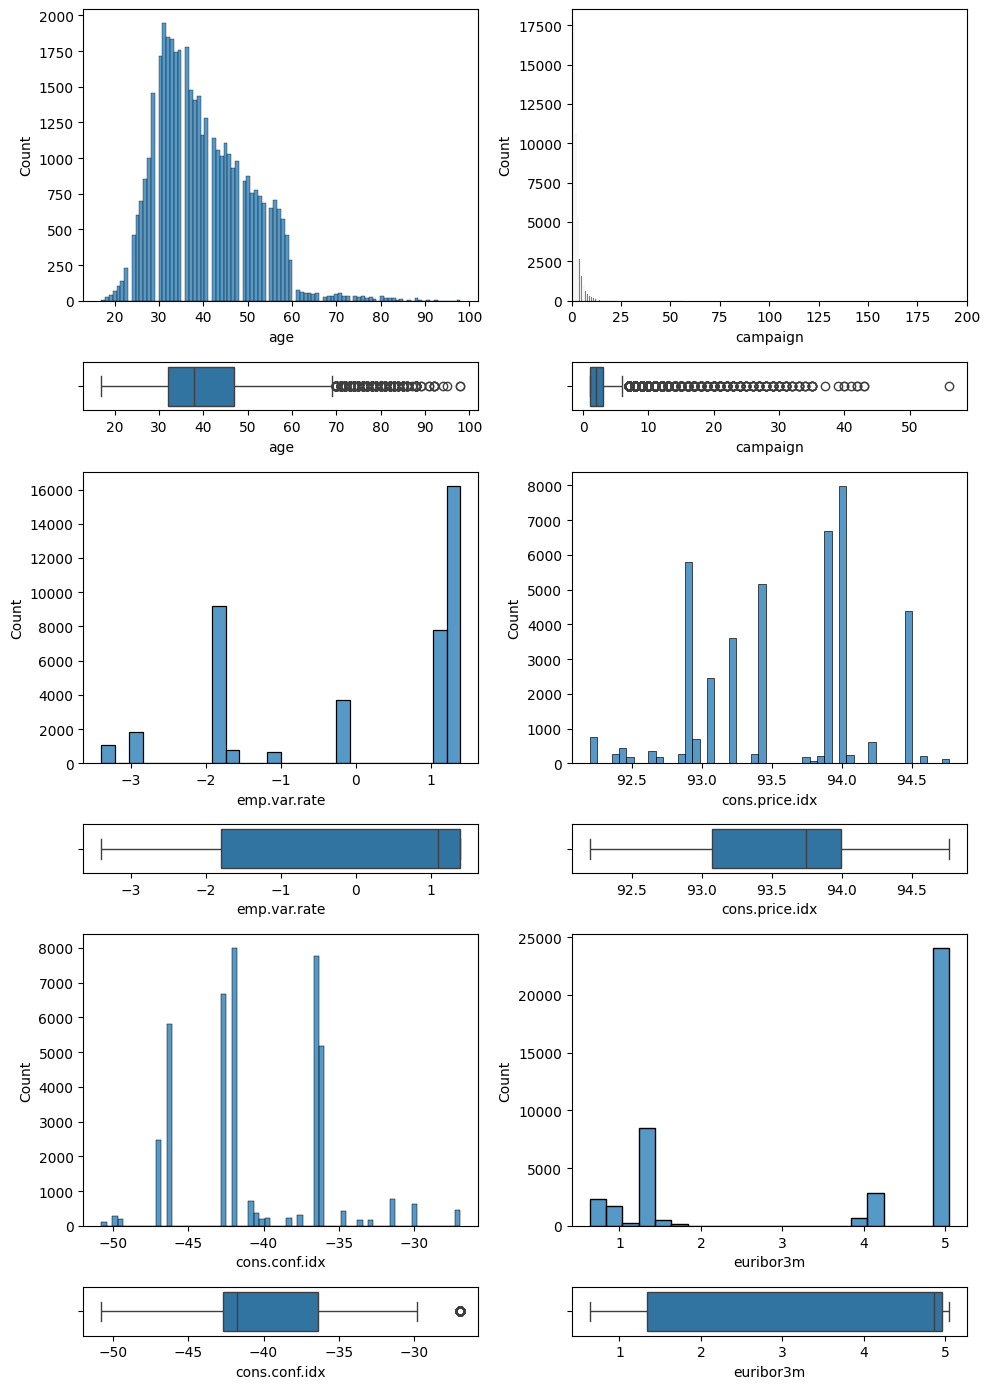

In [59]:
fig, axis = plt.subplots(6, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1,6,1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")

sns.histplot(ax = axis[0, 1], data = total_data, x = "campaign").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "campaign")

sns.histplot(ax = axis[2, 0], data = total_data, x = "emp.var.rate")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "emp.var.rate")

sns.histplot(ax = axis[2, 1], data = total_data, x = "cons.price.idx")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "cons.price.idx")

sns.histplot(ax = axis[4, 0], data = total_data, x = "cons.conf.idx")
sns.boxplot(ax = axis[5, 0], data = total_data, x = "cons.conf.idx")

sns.histplot(ax = axis[4, 1], data = total_data, x = "euribor3m")
sns.boxplot(ax = axis[5, 1], data = total_data, x = "euribor3m")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Analisis de variables multivariante

Analisis numérico-numérico

Factorizacion solo de "y", para poder compara los valores con la predictora y realizar la grafica

In [60]:
total_data["y_n"] = pd.factorize(total_data["y"])[0]
total_data[["y_n", "y"]]

,y_n,y
0,0,no
1,0,no
2,0,no
3,0,no
4,0,no
...,...,...
41183,1,yes
41184,0,no
41185,0,no
41186,1,yes


In [61]:
total_data[["y_n", "y"]].drop_duplicates()

,y_n,y
0,0,no
75,1,yes


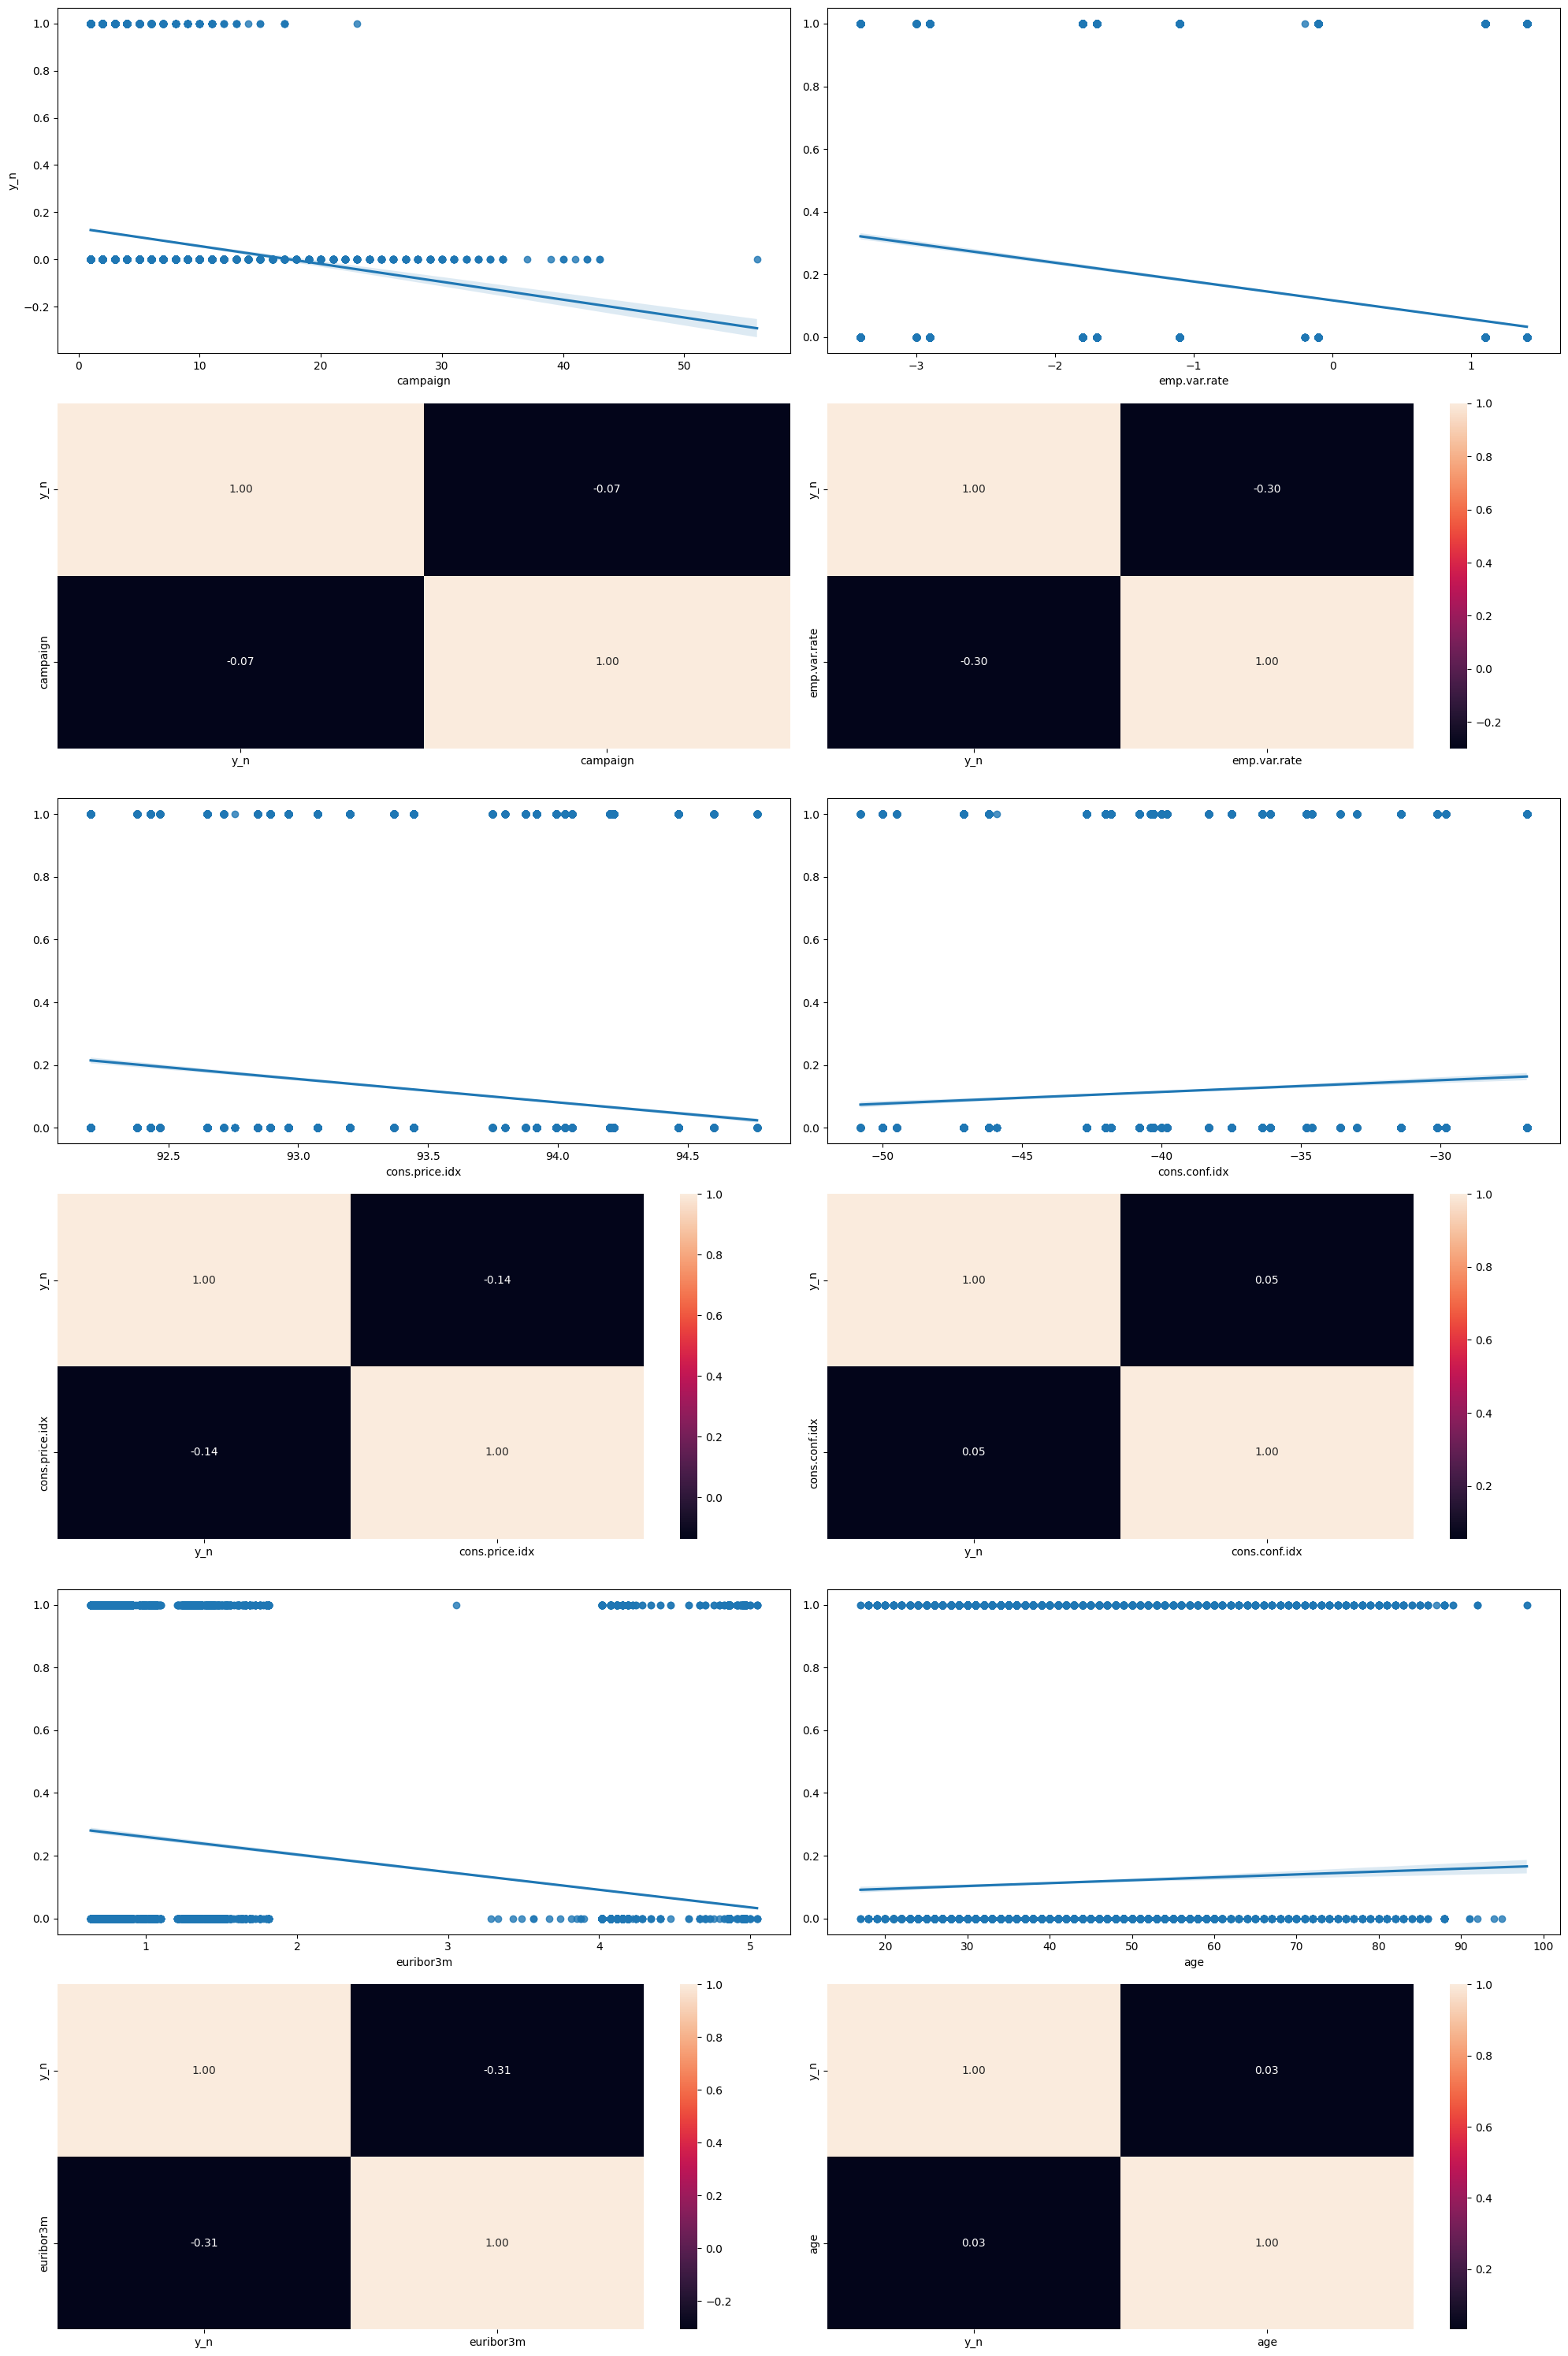

In [62]:
fig, axis = plt.subplots(6, 2, figsize = (20, 30))

sns.regplot(ax = axis[0, 0], data = total_data, x = "campaign", y = "y_n")
sns.heatmap(total_data[["y_n", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "emp.var.rate", y = "y_n").set(ylabel = None)
sns.heatmap(total_data[["y_n", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "cons.price.idx", y = "y_n").set(ylabel = None)
sns.heatmap(total_data[["y_n", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)


sns.regplot(ax=axis[2, 1], data=total_data, x="cons.conf.idx", y="y_n").set(ylabel=None)
sns.heatmap(total_data[["y_n", "cons.conf.idx"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1]).set(ylabel=None)

sns.regplot(ax=axis[4, 0], data=total_data, x="euribor3m", y="y_n").set(ylabel=None)
sns.heatmap(total_data[["y_n", "euribor3m"]].corr(), annot=True, fmt=".2f", ax=axis[5, 0]).set(ylabel=None)

sns.regplot(ax=axis[4, 1], data=total_data, x="age", y="y_n").set(ylabel=None)
sns.heatmap(total_data[["y_n", "age"]].corr(), annot=True, fmt=".2f", ax=axis[5, 1]).set(ylabel=None)



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Se puede visualizar en las graficas que no existe correlacion entre las variables numericas vitas con respecto a "Y"

Analisis categorico-categorico

para graficar colocamos "age" en rangos para mejor visualizacion de la grafica.

In [63]:
bins = [17, 30, 40, 50, 60, 70, 100] # Adjust these bins based on your data's actual distribution
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71+']

total_data['age_range'] = pd.cut(total_data['age'], bins=bins, labels=labels, right=False)

print(total_data[['age', 'age_range']].head())

   age age_range
0   56     51-60
1   57     51-60
2   37     31-40
3   40     41-50
4   56     51-60


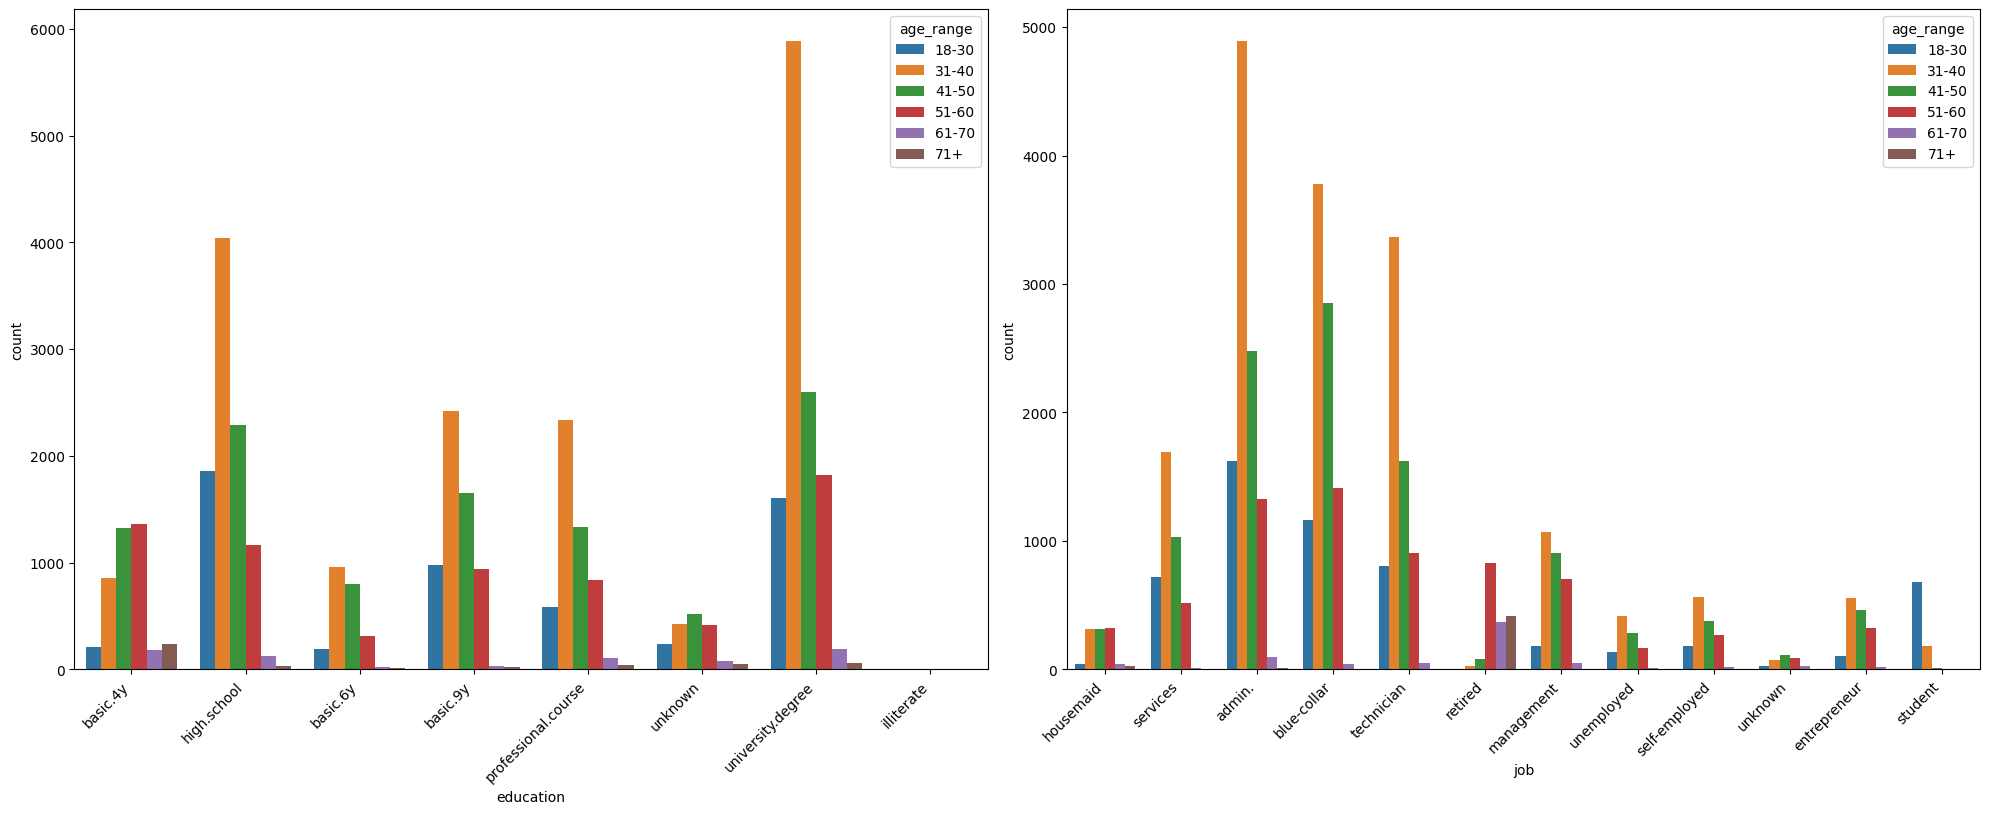

In [64]:
fig, axis = plt.subplots(2, 2, figsize = (20, 15))

sns.countplot(ax = axis[0, 0], data = total_data, x = "education", hue = "age_range")
sns.countplot(ax = axis[0, 1], data = total_data, x = "job", hue = "age_range")

plt.setp(axis[0,0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axis[0,1].get_xticklabels(), rotation=45, ha='right')

fig.delaxes(axis[1, 0])
fig.delaxes(axis[1, 1])

plt.tight_layout()


plt.show()

Educación vs. Edad: La gráfica de barras muestra la distribución de la educación por grupos de edad. Parece que la mayoría de las personas en el conjunto de datos tienen educación de nivel universitario o educación secundaria, y esto se distribuye de manera relativamente uniforme entre los diferentes grupos de edad representados.

Empleo vs. Edad: Esta gráfica muestra la distribución de los tipos de empleo por grupos de edad. Se pueden identificar las categorías de empleo más comunes y cómo varía su prevalencia entre las diferentes edades. Al igual que con la educación.

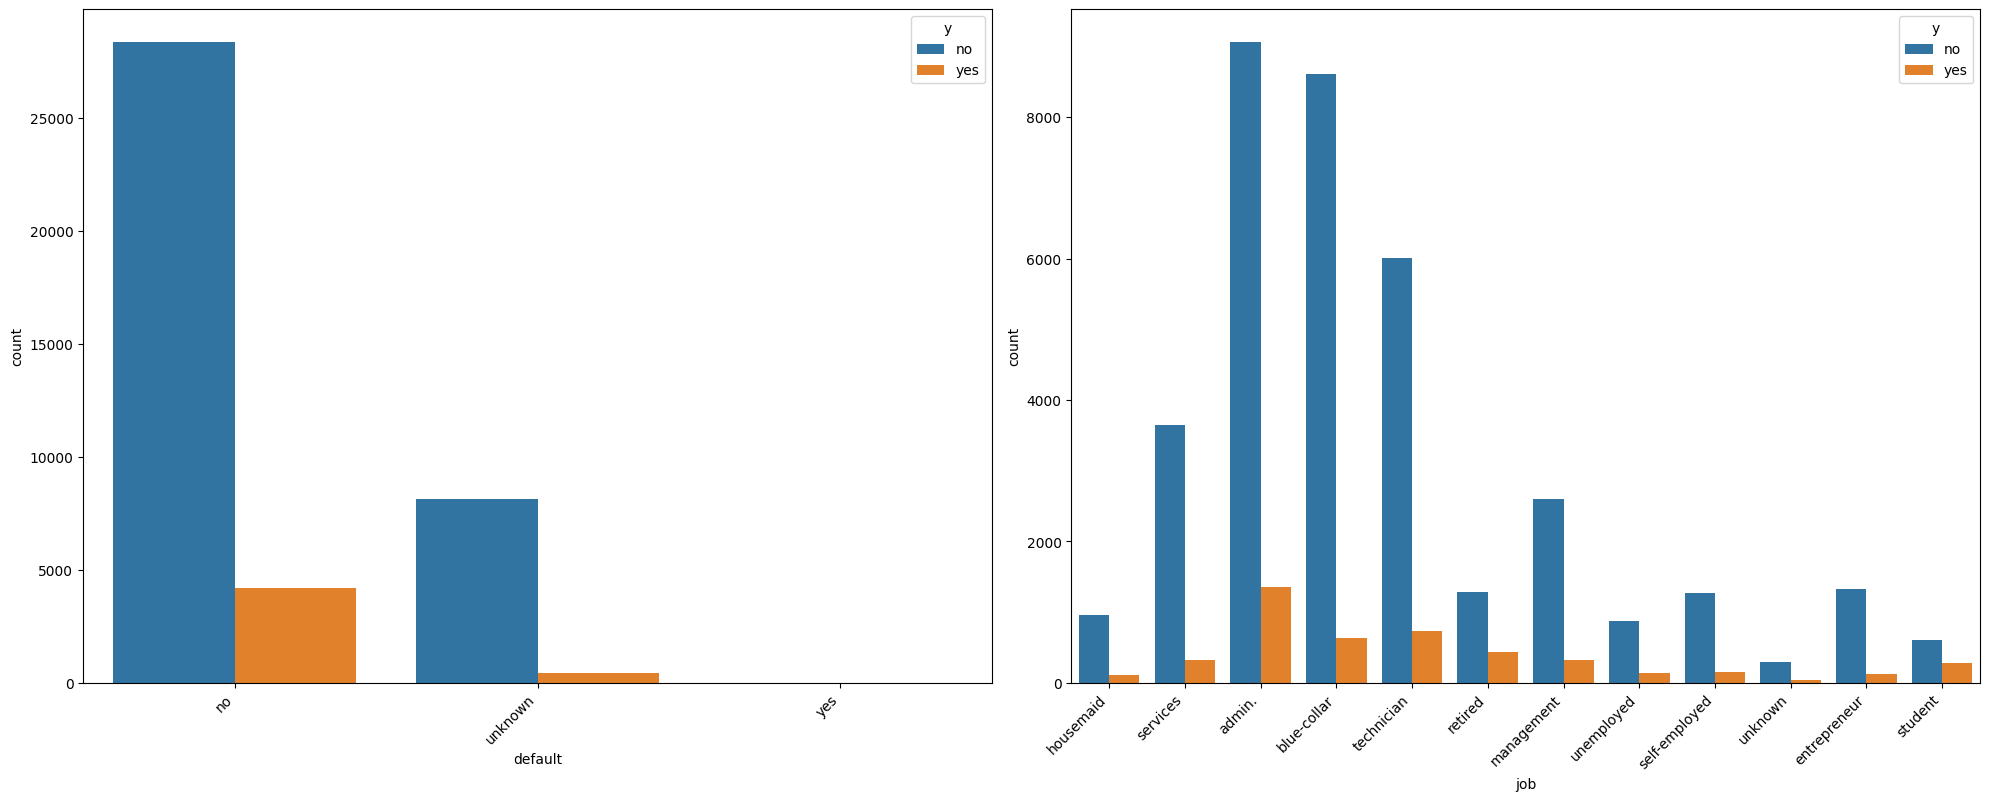

In [65]:
fig, axis = plt.subplots(2, 2, figsize = (20, 15))

sns.countplot(ax = axis[0, 0], data = total_data, x = "default", hue = "y")
sns.countplot(ax = axis[0, 1], data = total_data, x = "job", hue = "y")

plt.setp(axis[0,0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axis[0,1].get_xticklabels(), rotation=45, ha='right')

fig.delaxes(axis[1, 0])
fig.delaxes(axis[1, 1])

plt.tight_layout()

Para la grafica de la izquierda podemos observar que la gran mayoría de los clientes no tienen créditos en default.
El número de clientes con default es muy pequeño en comparación. Tanto para los clientes con default como para los que no lo tienen, la cantidad de suscripciones a un depósito a plazo es considerablemente menor que la cantidad de no suscripciones.

Para la grafica de la derecha podemos observar que las categorías de trabajo más comunes en este conjunto de datos son admin. y blue-collar, seguidas de technician.
La categoría de trabajo con más suscripciones a depósitos a plazo es admin., aunque en proporción, los students y retired parecen tener una tasa de suscripción más alta en relación a su número total, en general, para todas las categorías de trabajo, el número de no suscripciones es significativamente mayor que el de suscripciones.

Combinaciones de la clase con varias predictoras

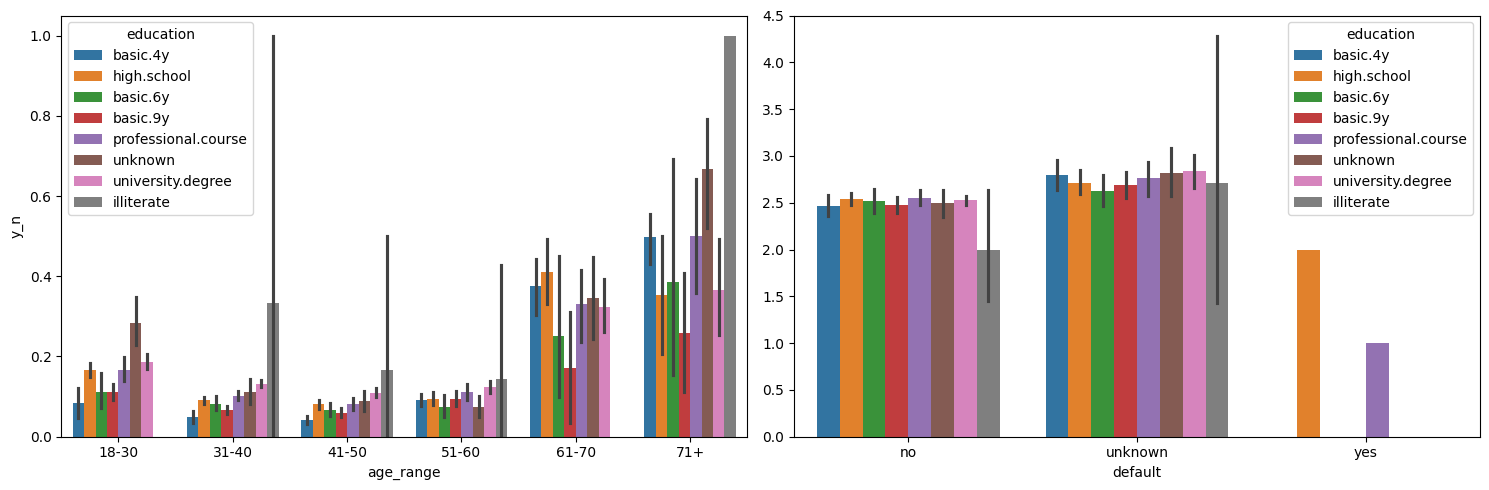

In [66]:
fig, axis = plt.subplots(figsize = (15, 5), ncols = 2)

sns.barplot(ax = axis[0], data = total_data, x = "age_range", y = "y_n", hue = "education")
sns.barplot(ax = axis[1], data = total_data, x = "default", y = "campaign", hue = "education").set(ylabel = None)


plt.tight_layout()

plt.show()

Interpretacion grafica de la izquierda: Al examinar esta gráfica, podemos identificar qué segmentos de la población, definidos por su edad y educación, mostraron una mayor propensión a responder positivamente a la campaña. Por ejemplo, si las barras correspondientes a personas en el rango de edad '31-40' con educación 'tertiary' son notablemente más altas, sugiere que este grupo fue particularmente receptivo. Comparar las alturas de las barras entre los diferentes grupos nos permite destacar los segmentos de alto y bajo rendimiento en términos de respuesta a la campaña.

Interpretacion grafica de la derecha: Esta gráfica nos permite entender si el esfuerzo de la campaña, medido por la cantidad de interacciones, varió en función del historial crediticio previo y el nivel educativo del cliente. Una barra más alta indica que, en promedio, se realizaron más intentos de contacto con ese grupo particular. Al comparar las barras, podemos observar si se dirigieron más esfuerzos a personas con o sin historial de incumplimiento, o si el nivel educativo influyó en la intensidad de la campaña. Este análisis es importante para evaluar si la estrategia de contacto fue uniforme o si hubo una diferenciación basada en estas características, y para considerar cómo esto pudo haber impactado los resultados.

Analisis numerico-categorico (completo)

In [67]:
total_data["job_n"] = pd.factorize(total_data["job"])[0]
total_data[["job_n", "job"]]

,job_n,job
0,0,housemaid
1,1,services
2,1,services
3,2,admin.
4,1,services
...,...,...
41183,5,retired
41184,3,blue-collar
41185,5,retired
41186,4,technician


In [68]:
total_data[["job_n", "job"]].drop_duplicates()

,job_n,job
0,0,housemaid
1,1,services
3,2,admin.
7,3,blue-collar
8,4,technician
15,5,retired
19,6,management
20,7,unemployed
27,8,self-employed
29,9,unknown


In [69]:
job_transformation_rules = {row["job"]: row["job_n"] for index, row in total_data[["job_n", "job"]].dropna().drop_duplicates().iterrows()}
print(job_transformation_rules)

import json

# Escritura
with open("./job_transformation_rules.json", "w") as f:
  json.dump(job_transformation_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./job_transformation_rules.json", "r") as f:
  job_transformation_rules = json.load(f)



total_data["job_n"] = total_data["job"].apply(lambda x: job_transformation_rules[x] if not pd.isna(x) else np.nan)
total_data

{'housemaid': 0, 'services': 1, 'admin.': 2, 'blue-collar': 3, 'technician': 4, 'retired': 5, 'management': 6, 'unemployed': 7, 'self-employed': 8, 'unknown': 9, 'entrepreneur': 10, 'student': 11}


,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,y_n,age_range,job_n
0,56,housemaid,married,basic.4y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,51-60,0
1,57,services,married,high.school,unknown,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,51-60,1
2,37,services,married,high.school,no,yes,no,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,31-40,1
3,40,admin.,married,basic.6y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,41-50,2
4,56,services,married,high.school,no,no,yes,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,51-60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,1,nonexistent,-1.1,94.767,-50.8,1.028,yes,1,71+,5
41184,46,blue-collar,married,professional.course,no,no,no,1,nonexistent,-1.1,94.767,-50.8,1.028,no,0,41-50,3
41185,56,retired,married,university.degree,no,yes,no,2,nonexistent,-1.1,94.767,-50.8,1.028,no,0,51-60,5
41186,44,technician,married,professional.course,no,no,no,1,nonexistent,-1.1,94.767,-50.8,1.028,yes,1,41-50,4


In [70]:
total_data["education_n"] = pd.factorize(total_data["education"])[0]
total_data[["education_n", "education"]]

,education_n,education
0,0,basic.4y
1,1,high.school
2,1,high.school
3,2,basic.6y
4,1,high.school
...,...,...
41183,4,professional.course
41184,4,professional.course
41185,6,university.degree
41186,4,professional.course


In [71]:
total_data[["education_n", "education"]].drop_duplicates()

,education_n,education
0,0,basic.4y
1,1,high.school
3,2,basic.6y
5,3,basic.9y
6,4,professional.course
7,5,unknown
25,6,university.degree
5393,7,illiterate


In [72]:
education_transformation_rules = {row["education"]: row["education_n"] for index, row in total_data[["education_n", "education"]].dropna().drop_duplicates().iterrows()}
print(education_transformation_rules)

import json

# Escritura
with open("./education_transformation_rules.json", "w") as f:
  json.dump(education_transformation_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./education_transformation_rules.json", "r") as f:
  education_transformation_rules = json.load(f)


total_data["education_n"] = total_data["education"].apply(lambda x: education_transformation_rules[x] if not pd.isna(x) else np.nan)
total_data

{'basic.4y': 0, 'high.school': 1, 'basic.6y': 2, 'basic.9y': 3, 'professional.course': 4, 'unknown': 5, 'university.degree': 6, 'illiterate': 7}


,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,y_n,age_range,job_n,education_n
0,56,housemaid,married,basic.4y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,51-60,0,0
1,57,services,married,high.school,unknown,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,51-60,1,1
2,37,services,married,high.school,no,yes,no,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,31-40,1,1
3,40,admin.,married,basic.6y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,41-50,2,2
4,56,services,married,high.school,no,no,yes,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,51-60,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,1,nonexistent,-1.1,94.767,-50.8,1.028,yes,1,71+,5,4
41184,46,blue-collar,married,professional.course,no,no,no,1,nonexistent,-1.1,94.767,-50.8,1.028,no,0,41-50,3,4
41185,56,retired,married,university.degree,no,yes,no,2,nonexistent,-1.1,94.767,-50.8,1.028,no,0,51-60,5,6
41186,44,technician,married,professional.course,no,no,no,1,nonexistent,-1.1,94.767,-50.8,1.028,yes,1,41-50,4,4


In [73]:
total_data["default_n"] = pd.factorize(total_data["default"])[0]
total_data[["default_n", "default"]]

,default_n,default
0,0,no
1,1,unknown
2,0,no
3,0,no
4,0,no
...,...,...
41183,0,no
41184,0,no
41185,0,no
41186,0,no


In [74]:
total_data[["default_n", "default"]].drop_duplicates()

,default_n,default
0,0,no
1,1,unknown
21580,2,yes


In [75]:
default_transformation_rules = {row["default"]: row["default_n"] for index, row in total_data[["default_n", "default"]].dropna().drop_duplicates().iterrows()}
print(default_transformation_rules)

import json

# Escritura
with open("./default_transformation_rules.json", "w") as f:
  json.dump(default_transformation_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./default_transformation_rules.json", "r") as f:
  default_transformation_rules = json.load(f)


total_data["default_n"] = total_data["default"].apply(lambda x: default_transformation_rules[x] if not pd.isna(x) else np.nan)
total_data

{'no': 0, 'unknown': 1, 'yes': 2}


,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,y_n,age_range,job_n,education_n,default_n
0,56,housemaid,married,basic.4y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,51-60,0,0,0
1,57,services,married,high.school,unknown,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,51-60,1,1,1
2,37,services,married,high.school,no,yes,no,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,31-40,1,1,0
3,40,admin.,married,basic.6y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,41-50,2,2,0
4,56,services,married,high.school,no,no,yes,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,51-60,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,1,nonexistent,-1.1,94.767,-50.8,1.028,yes,1,71+,5,4,0
41184,46,blue-collar,married,professional.course,no,no,no,1,nonexistent,-1.1,94.767,-50.8,1.028,no,0,41-50,3,4,0
41185,56,retired,married,university.degree,no,yes,no,2,nonexistent,-1.1,94.767,-50.8,1.028,no,0,51-60,5,6,0
41186,44,technician,married,professional.course,no,no,no,1,nonexistent,-1.1,94.767,-50.8,1.028,yes,1,41-50,4,4,0


In [76]:
total_data["housing_n"] = pd.factorize(total_data["housing"])[0]
total_data[["default_n", "housing"]]

,default_n,housing
0,0,no
1,1,no
2,0,yes
3,0,no
4,0,no
...,...,...
41183,0,yes
41184,0,no
41185,0,yes
41186,0,no


In [77]:
total_data[["housing_n", "housing"]].drop_duplicates()

,housing_n,housing
0,0,no
2,1,yes
29,2,unknown


In [78]:
housing_transformation_rules = {row["housing"]: row["housing_n"] for index, row in total_data[["housing_n", "housing"]].dropna().drop_duplicates().iterrows()}
print(housing_transformation_rules)

import json

# Escritura
with open("./housing_transformation_rules.json", "w") as f:
  json.dump(housing_transformation_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./housing_transformation_rules.json", "r") as f:
  housing_transformation_rules = json.load(f)


total_data["housing_n"] = total_data["housing"].apply(lambda x: housing_transformation_rules[x] if not pd.isna(x) else np.nan)
total_data

{'no': 0, 'yes': 1, 'unknown': 2}


,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,y_n,age_range,job_n,education_n,default_n,housing_n
0,56,housemaid,married,basic.4y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,51-60,0,0,0,0
1,57,services,married,high.school,unknown,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,51-60,1,1,1,0
2,37,services,married,high.school,no,yes,no,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,31-40,1,1,0,1
3,40,admin.,married,basic.6y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,41-50,2,2,0,0
4,56,services,married,high.school,no,no,yes,1,nonexistent,1.1,93.994,-36.4,4.857,no,0,51-60,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,1,nonexistent,-1.1,94.767,-50.8,1.028,yes,1,71+,5,4,0,1
41184,46,blue-collar,married,professional.course,no,no,no,1,nonexistent,-1.1,94.767,-50.8,1.028,no,0,41-50,3,4,0,0
41185,56,retired,married,university.degree,no,yes,no,2,nonexistent,-1.1,94.767,-50.8,1.028,no,0,51-60,5,6,0,1
41186,44,technician,married,professional.course,no,no,no,1,nonexistent,-1.1,94.767,-50.8,1.028,yes,1,41-50,4,4,0,0


In [79]:
total_data["loan_n"] = pd.factorize(total_data["loan"])[0]
total_data[["loan_n", "loan"]]

,loan_n,loan
0,0,no
1,0,no
2,0,no
3,0,no
4,1,yes
...,...,...
41183,0,no
41184,0,no
41185,0,no
41186,0,no


In [80]:
total_data[["loan_n", "loan"]].drop_duplicates()

,loan_n,loan
0,0,no
4,1,yes
29,2,unknown


In [81]:
loan_transformation_rules = {row["loan"]: row["loan_n"] for index, row in total_data[["loan_n", "loan"]].dropna().drop_duplicates().iterrows()}
print(loan_transformation_rules)

import json

# Escritura
with open("./loan_transformation_rules.json", "w") as f:
  json.dump(loan_transformation_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./loan_transformation_rules.json", "r") as f:
  loan_transformation_rules = json.load(f)


total_data["loan_n"] = total_data["loan"].apply(lambda x: loan_transformation_rules[x] if not pd.isna(x) else np.nan)
total_data

{'no': 0, 'yes': 1, 'unknown': 2}


,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,...,cons.conf.idx,euribor3m,y,y_n,age_range,job_n,education_n,default_n,housing_n,loan_n
0,56,housemaid,married,basic.4y,no,no,no,1,nonexistent,1.1,...,-36.4,4.857,no,0,51-60,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,1,nonexistent,1.1,...,-36.4,4.857,no,0,51-60,1,1,1,0,0
2,37,services,married,high.school,no,yes,no,1,nonexistent,1.1,...,-36.4,4.857,no,0,31-40,1,1,0,1,0
3,40,admin.,married,basic.6y,no,no,no,1,nonexistent,1.1,...,-36.4,4.857,no,0,41-50,2,2,0,0,0
4,56,services,married,high.school,no,no,yes,1,nonexistent,1.1,...,-36.4,4.857,no,0,51-60,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,1,nonexistent,-1.1,...,-50.8,1.028,yes,1,71+,5,4,0,1,0
41184,46,blue-collar,married,professional.course,no,no,no,1,nonexistent,-1.1,...,-50.8,1.028,no,0,41-50,3,4,0,0,0
41185,56,retired,married,university.degree,no,yes,no,2,nonexistent,-1.1,...,-50.8,1.028,no,0,51-60,5,6,0,1,0
41186,44,technician,married,professional.course,no,no,no,1,nonexistent,-1.1,...,-50.8,1.028,yes,1,41-50,4,4,0,0,0


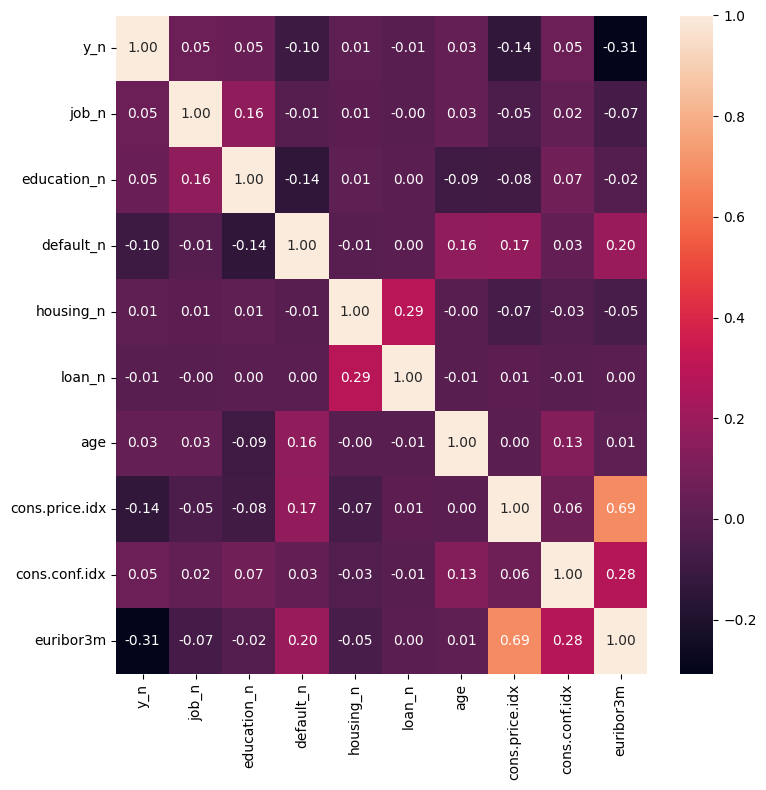

In [82]:
fig, axes = plt.subplots(figsize=(8, 8))

sns.heatmap(total_data[["y_n", "job_n", "education_n", "default_n",	
                        "housing_n", "loan_n", "age", "cons.price.idx", "cons.conf.idx", "euribor3m"]].corr(), annot = True, fmt = ".2f")


plt.tight_layout()

# Draw Plot
plt.show()

El mapa de calor revela que las variables económicas euribor3m y cons.price.idx están fuertemente correlacionadas positivamente. La tasa Euribor a 3 meses (euribor3m) muestra una correlación negativa con la suscripción a depósitos a plazo (y_n), sugiriendo que a mayor tasa de interés, menor es la probabilidad de suscripción. Las variables de trabajo y educación también están fuertemente correlacionadas. En general, el mapa de calor destaca la importancia de los factores económicos en las decisiones de los clientes.

Ingenieria de caracteristicas

valores atipicos

In [83]:
total_data.describe()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y_n,job_n,education_n,default_n,housing_n,loan_n
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,0.081886,93.575664,-40.502600,3.621291,0.112654,3.673691,3.277532,0.208872,0.571914,0.199767
std,10.42125,2.770014,1.570960,0.578840,4.628198,1.734447,0.316173,2.454116,2.185525,0.406686,0.541209,0.456002
min,17.00000,1.000000,-3.400000,92.201000,-50.800000,0.634000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,-1.800000,93.075000,-42.700000,1.344000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,38.00000,2.000000,1.100000,93.749000,-41.800000,4.857000,0.000000,3.000000,3.000000,0.000000,1.000000,0.000000
75%,47.00000,3.000000,1.400000,93.994000,-36.400000,4.961000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000
max,98.00000,56.000000,1.400000,94.767000,-26.900000,5.045000,1.000000,11.000000,7.000000,2.000000,2.000000,2.000000


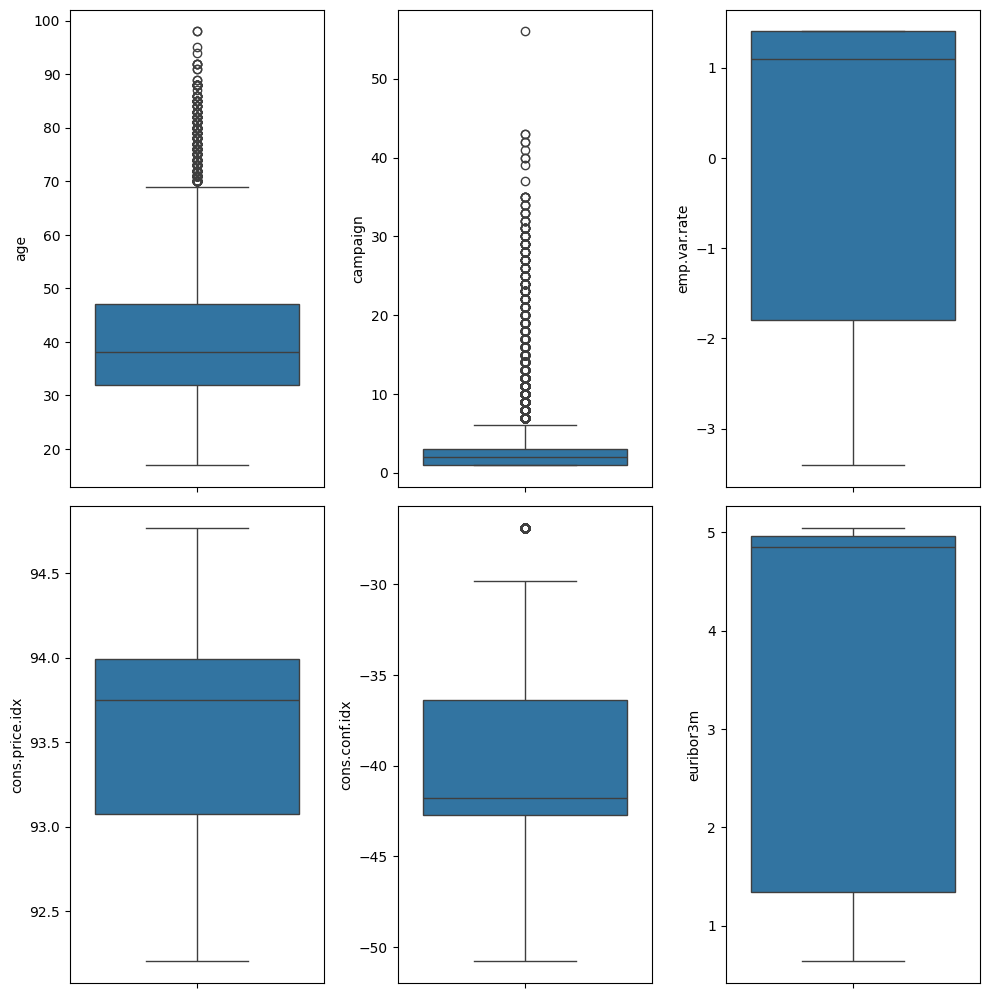

In [84]:
fig, axes = plt.subplots(3, 3, figsize = (10, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "campaign")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "emp.var.rate")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "cons.price.idx")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "cons.conf.idx")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "euribor3m")

fig.delaxes(axes[2, 0])
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

plt.tight_layout()

plt.show()

Deteccion de valores atipicos.

In [85]:
total_data_CON_outliers = total_data.copy()

total_data_SIN_outliers = total_data.copy()
# Para cada una de las variables con outliers en mi problema, tengo que reemplazar sus valores del DF

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["age", "campaign", "cons.conf.idx"]:
  total_data_SIN_outliers, limit_list = replace_outliers_from_column(column, total_data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'age': [np.float64(9.5), np.float64(69.5)],
 'campaign': [1, np.float64(6.0)],
 'cons.conf.idx': [-50.8, np.float64(-26.949999999999992)]}

In [86]:
total_data_CON_outliers

,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,...,cons.conf.idx,euribor3m,y,y_n,age_range,job_n,education_n,default_n,housing_n,loan_n
0,56,housemaid,married,basic.4y,no,no,no,1,nonexistent,1.1,...,-36.4,4.857,no,0,51-60,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,1,nonexistent,1.1,...,-36.4,4.857,no,0,51-60,1,1,1,0,0
2,37,services,married,high.school,no,yes,no,1,nonexistent,1.1,...,-36.4,4.857,no,0,31-40,1,1,0,1,0
3,40,admin.,married,basic.6y,no,no,no,1,nonexistent,1.1,...,-36.4,4.857,no,0,41-50,2,2,0,0,0
4,56,services,married,high.school,no,no,yes,1,nonexistent,1.1,...,-36.4,4.857,no,0,51-60,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,1,nonexistent,-1.1,...,-50.8,1.028,yes,1,71+,5,4,0,1,0
41184,46,blue-collar,married,professional.course,no,no,no,1,nonexistent,-1.1,...,-50.8,1.028,no,0,41-50,3,4,0,0,0
41185,56,retired,married,university.degree,no,yes,no,2,nonexistent,-1.1,...,-50.8,1.028,no,0,51-60,5,6,0,1,0
41186,44,technician,married,professional.course,no,no,no,1,nonexistent,-1.1,...,-50.8,1.028,yes,1,41-50,4,4,0,0,0


In [87]:
total_data_SIN_outliers

,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,...,cons.conf.idx,euribor3m,y,y_n,age_range,job_n,education_n,default_n,housing_n,loan_n
0,56.0,housemaid,married,basic.4y,no,no,no,1.0,nonexistent,1.1,...,-36.4,4.857,no,0,51-60,0,0,0,0,0
1,57.0,services,married,high.school,unknown,no,no,1.0,nonexistent,1.1,...,-36.4,4.857,no,0,51-60,1,1,1,0,0
2,37.0,services,married,high.school,no,yes,no,1.0,nonexistent,1.1,...,-36.4,4.857,no,0,31-40,1,1,0,1,0
3,40.0,admin.,married,basic.6y,no,no,no,1.0,nonexistent,1.1,...,-36.4,4.857,no,0,41-50,2,2,0,0,0
4,56.0,services,married,high.school,no,no,yes,1.0,nonexistent,1.1,...,-36.4,4.857,no,0,51-60,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,retired,married,professional.course,no,yes,no,1.0,nonexistent,-1.1,...,-50.8,1.028,yes,1,71+,5,4,0,1,0
41184,46.0,blue-collar,married,professional.course,no,no,no,1.0,nonexistent,-1.1,...,-50.8,1.028,no,0,41-50,3,4,0,0,0
41185,56.0,retired,married,university.degree,no,yes,no,2.0,nonexistent,-1.1,...,-50.8,1.028,no,0,51-60,5,6,0,1,0
41186,44.0,technician,married,professional.course,no,no,no,1.0,nonexistent,-1.1,...,-50.8,1.028,yes,1,41-50,4,4,0,0,0


In [88]:
total_data_CON_outliers.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
campaign          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
y_n               0
age_range         0
job_n             0
education_n       0
default_n         0
housing_n         0
loan_n            0
dtype: int64

In [89]:
total_data_SIN_outliers.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
campaign          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
y_n               0
age_range         0
job_n             0
education_n       0
default_n         0
housing_n         0
loan_n            0
dtype: int64

Obtencion de porcentajes por columnas de datos vacios (para posibles futuros casos)

In [90]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
campaign          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
y                 0.0
y_n               0.0
age_range         0.0
job_n             0.0
education_n       0.0
default_n         0.0
housing_n         0.0
loan_n            0.0
dtype: float64

In [91]:
total_data.head()

,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,...,cons.conf.idx,euribor3m,y,y_n,age_range,job_n,education_n,default_n,housing_n,loan_n
0,56,housemaid,married,basic.4y,no,no,no,1,nonexistent,1.1,...,-36.4,4.857,no,0,51-60,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,1,nonexistent,1.1,...,-36.4,4.857,no,0,51-60,1,1,1,0,0
2,37,services,married,high.school,no,yes,no,1,nonexistent,1.1,...,-36.4,4.857,no,0,31-40,1,1,0,1,0
3,40,admin.,married,basic.6y,no,no,no,1,nonexistent,1.1,...,-36.4,4.857,no,0,41-50,2,2,0,0,0
4,56,services,married,high.school,no,no,yes,1,nonexistent,1.1,...,-36.4,4.857,no,0,51-60,1,1,0,0,1


Escalado de valores

In [92]:
from sklearn.model_selection import train_test_split

num_variables = ["age", "campaign", "job_n", "campaign", 
                 "education_n", "default_n", "housing_n","loan_n"]

# Dividimos el conjunto de datos en muestras de train y test
X_CON = total_data_CON_outliers.drop("y_n", axis = 1)[num_variables]
y = total_data_CON_outliers["y_n"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = total_data_SIN_outliers.drop("y_n", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

,age,campaign,job_n,campaign,education_n,default_n,housing_n,loan_n
12556,40,2,3,2,3,1,1,0
35451,31,4,2,4,6,0,0,0
30592,59,6,5,6,0,0,0,0
17914,43,5,0,5,3,0,1,0
3315,39,2,2,2,1,1,0,0


Normalización

In [93]:
from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)


### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

,age,campaign,job_n,campaign,education_n,default_n,housing_n,loan_n
12556,-0.001669,-0.206242,-0.271142,-0.206242,-0.12745,1.948567,0.787712,-0.438945
35451,-0.864095,0.513676,-0.677848,0.513676,1.24463,-0.512631,-1.056870,-0.438945
30592,1.819007,1.233593,0.542271,1.233593,-1.49953,-0.512631,-1.056870,-0.438945
17914,0.285806,0.873635,-1.491260,0.873635,-0.12745,-0.512631,0.787712,-0.438945
3315,-0.097494,-0.206242,-0.677848,-0.206242,-1.04217,1.948567,-1.056870,-0.438945


Escalado Minimo-Maximo

In [94]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)


### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()

,age,campaign,job_n,campaign,education_n,default_n,housing_n,loan_n
12556,0.283951,0.018182,0.272727,0.018182,0.428571,0.5,0.5,0.0
35451,0.172840,0.054545,0.181818,0.054545,0.857143,0.0,0.0,0.0
30592,0.518519,0.090909,0.454545,0.090909,0.000000,0.0,0.0,0.0
17914,0.320988,0.072727,0.000000,0.072727,0.428571,0.0,0.5,0.0
3315,0.271605,0.018182,0.181818,0.018182,0.142857,0.5,0.0,0.0


In [95]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [96]:
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)

X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

Regresion Logistica

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

results = []
models = []
for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
]:
  model = LogisticRegression() # Modelo base
  model.fit(dataset, y_train)
  y_pred = model.predict(dataset)
  results.append(accuracy_score(y_train, y_pred))
  models.append(model)

print(results)
max(results)


[0.887556904400607, 0.887556904400607, 0.887556904400607, 0.887556904400607, 0.887556904400607, 0.887556904400607]


0.887556904400607

In [98]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Definimos los parámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,n_iter,100
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [99]:
random_search.fit(X_train_con_outliers, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:34

Mejores hiperparámetros: {'solver': 'saga', 'penalty': 'l2', 'C': np.float64(1.623776739188721)}


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [100]:
# Grid Search

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(LogisticRegression(), hyperparams, scoring = "accuracy")
grid.fit(X_train_con_outliers, y_train)
grid.best_params_

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:34

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:34

{'C': np.float64(0.0001), 'penalty': 'l1', 'solver': 'liblinear'}

In [101]:
# Random Search

from sklearn.model_selection import RandomizedSearchCV

grid = RandomizedSearchCV(LogisticRegression(), hyperparams, scoring = "accuracy", n_iter = 20, random_state = 40)
grid.fit(X_train_con_outliers, y_train)
grid.best_params_

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: Converg

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232:

{'solver': 'sag', 'penalty': 'l2', 'C': np.float64(11.288378916846883)}